In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, classification_report ,f1_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [5]:
def feature_types(df):
    categ = []
    numer = []
    for c in df.columns:
        if df[c].dtype == 'object': categ.append(c)
        else: numer.append(c)
    return categ, numer

In [6]:
categ, numer = feature_types(df)
print(f'cat: {categ}')

cat: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']


Text(0.5, 1.0, 'Behavior')

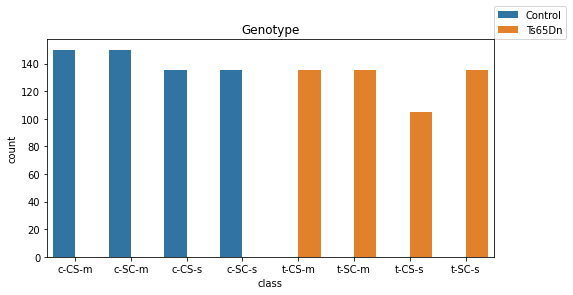

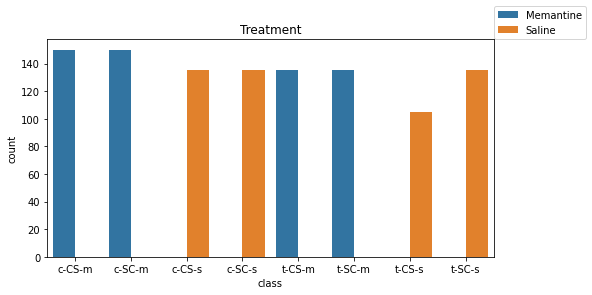

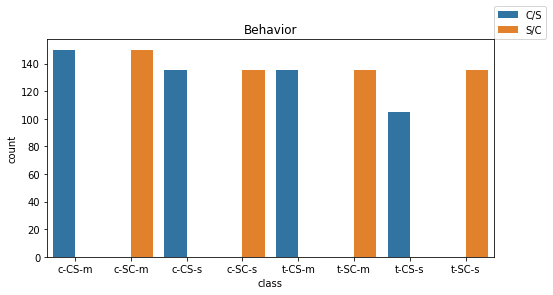

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x='class', data=df, hue='Genotype')
plt.legend(loc=(1,1))
plt.title('Genotype')

plt.figure(figsize=(8,4))
sns.countplot(x='class', data=df, hue='Treatment')
plt.legend(loc=(1,1))
plt.title('Treatment')

plt.figure(figsize=(8,4))
sns.countplot(x='class', data=df, hue='Behavior')
plt.legend(loc=(1,1))
plt.title('Behavior')

Как мы видим, то категориальные данные в точности описывают ответ, поэтму при обучении мы не будем их использовать. 

In [66]:

x = df.loc[:,numer].values
y = df['class']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.loc[:,numer].dropna(how='any').values)
x = imp.transform(x)

minmax = MinMaxScaler()
x = minmax.fit_transform(x)

ordi = OrdinalEncoder()
y = ordi.fit_transform(y[:,np.newaxis]).T[0].astype('int')
cat = ordi.categories_[0]

X_train, X_test, y_Train, y_test = train_test_split(x, y, test_size=0.2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]


acc: 0.8425925925925926
f1: 0.8404452671249296


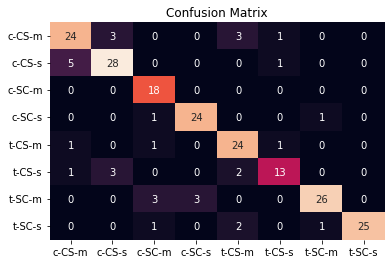

In [88]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_Train)
pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree)
f1_tree = f1_score(y_test, pred_tree, average='macro')

sns.heatmap(confusion_matrix(y_test,pred_tree),
            xticklabels=cat, yticklabels=cat,
            annot=True)
plt.title('Confusion Matrix')
print('acc:', acc_tree)
print('f1:', f1_tree)

acc: 0.8425925925925926
f1: 0.9884615384615385


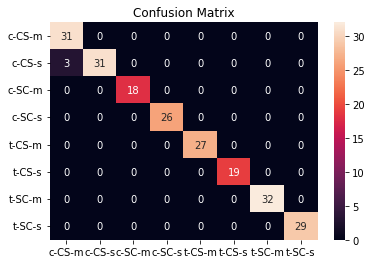

In [92]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_Train)
pred_forest = forest.predict(X_test)
acc_forest = accuracy_score(y_test, pred_forest)
f1_forest = f1_score(y_test, pred_forest, average='macro')

sns.heatmap(confusion_matrix(y_test,pred_forest),
            xticklabels=cat, yticklabels=cat,
            annot=True)
plt.title('Confusion Matrix')
print('acc:', acc_forest)
print('f1:', f1_forest)

In [93]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


Learning rate set to 0.078539
0:	learn: 1.9891969	total: 208ms	remaining: 3m 27s
1:	learn: 1.8531457	total: 321ms	remaining: 2m 40s
2:	learn: 1.7480910	total: 452ms	remaining: 2m 30s
3:	learn: 1.6584320	total: 573ms	remaining: 2m 22s
4:	learn: 1.5770476	total: 694ms	remaining: 2m 18s
5:	learn: 1.4919593	total: 812ms	remaining: 2m 14s
6:	learn: 1.4310771	total: 926ms	remaining: 2m 11s
7:	learn: 1.3730552	total: 1.04s	remaining: 2m 9s
8:	learn: 1.3192164	total: 1.16s	remaining: 2m 7s
9:	learn: 1.2773668	total: 1.28s	remaining: 2m 6s
10:	learn: 1.2268202	total: 1.41s	remaining: 2m 6s
11:	learn: 1.1768727	total: 1.53s	remaining: 2m 6s
12:	learn: 1.1384659	total: 1.65s	remaining: 2m 5s
13:	learn: 1.1005798	total: 1.76s	remaining: 2m 4s
14:	learn: 1.0619556	total: 1.89s	remaining: 2m 3s
15:	learn: 1.0211023	total: 2s	remaining: 2m 3s
16:	learn: 0.9907344	total: 2.12s	remaining: 2m 2s
17:	learn: 0.9596373	total: 2.24s	remaining: 2m 2s
18:	learn: 0.9229363	total: 2.35s	remaining: 2m 1s
19:	lea

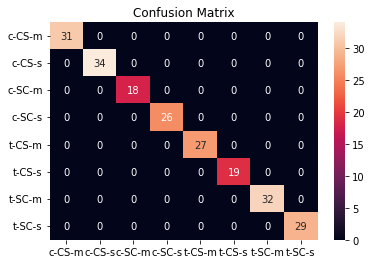

In [95]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_Train, loss_function='F1')
pred_catboost = catboost.predict(X_test)
acc_catboost = accuracy_score(y_test, pred_catboost)
f1_catboost = f1_score(y_test, pred_catboost, average='macro')

sns.heatmap(confusion_matrix(y_test,pred_catboost),
            xticklabels=cat, yticklabels=cat,
            annot=True)
plt.title('Confusion Matrix')
print('acc:', acc_catboost)
print('f1:', f1_catboost)